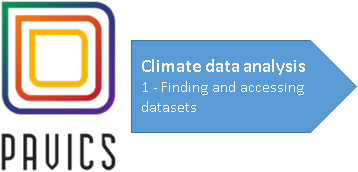

PAVICS climate datasets are hosted on a [THREDDS data server](https://www.unidata.ucar.edu/software/tds/current/) at https://pavics.ouranos.ca/thredds. Altough THREDDS provides a user-interface for browsing datasets, it is often more practical to  navigate the catalogue programatically. 

This tutorial demonstates how to access from a Python script an ensemble of climate simulations, namely Ouranos' standard ensemble of bias-adjusted climate scenarios version 1.0 (cb-oura-1.0). The ensemble contains [22 bias-adjusted CMIP5 simulations](https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/datasets/simulations/bias_adjusted/cmip5/ouranos/cb-oura-1.0/catalog.html) in netCDF format, each with three variables (tasmin, tasmax, pr) and dimensions of longitude, latitude and time (1064, 700, 55175). Instead of downloading huge volumes of data locally, this  tutorial shows how to stream only the relevant portion using a standard called Data Access Protocol (DAP).

The tutorial uses the [siphon](https://unidata.github.io/siphon/latest/index.html) library to browse the THREDDS catalog, and [xarray](http://xarray.pydata.org/en/stable/index.html) to open a streaming connection to the remote data. 

___

*NOTE : To run this series of tutorials in the PAVICS JupyterLab, notebooks should be copied into your 'writable-workspace' directory.*

In [1]:
from siphon.catalog import TDSCatalog
url = "https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/datasets/simulations/bias_adjusted/cmip5/ouranos/cb-oura-1.0/catalog.xml"

# Create Catalog
cat = TDSCatalog(url)

# List of datasets
print(f"Number of datasets: {len(cat.datasets)}")

# Access mechanisms - here we are interested in OPENDAP, a data streaming protocol
cds = cat.datasets[0]
print(f"Access URLs: {tuple(cds.access_urls.keys())}")

Number of datasets: 22
Access URLs: ('HTTPServer', 'OPENDAP', 'NCML', 'UDDC', 'ISO', 'WCS', 'WMS')


In [2]:
import xarray as xr

# This does not download the entire dataset, just the metadata and attributes describing the content. 
ds = xr.open_dataset(cds.access_urls["OPENDAP"], chunks='auto')

# What we see here is an in-memory representation of the full content, the actual data is still on the server.
ds

,Array,Chunk
Bytes,164.20 GB,59.96 MB
Shape,"(55115, 700, 1064)","(322, 175, 266)"
Count,2753 Tasks,2752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,164.20 GB,59.96 MB
Shape,"(55115, 700, 1064)","(322, 175, 266)"
Count,2753 Tasks,2752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [3]:
# Extract a subset of the file

# Again, this only creates an in-memory representation of the data
sub = ds.pr.sel(time="2050").sel(lon=-80, lat=46, method="nearest")

# The data is only downloaded when we actuall need it for a computation. 
sub.mean(keep_attrs=True).compute()

<xarray.DataArray 'pr' ()>
array(3.975487e-05, dtype=float32)
Coordinates:
    lon      float32 -79.96
    lat      float32 46.04
Attributes:
    units:          mm s-1
    long_name:      lwe_precipitation_rate
    standard_name:  lwe_precipitation_rate
    _ChunkSizes:    [365  50  56]

### Accessing the catalog using a python client
* Use `siphon` to get a list of datasets from the catalog url

In [4]:
datasets = []
for i, d in enumerate(cat.datasets):
    datasets.append(cat.datasets[i])   
display(datasets)

[day_NorESM1-M_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_NorESM1-M_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_MPI-ESM-LR_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_MPI-ESM-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5B-LR_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5B-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5A-LR_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5A-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_INM-CM4_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_INM-CM4_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_HadGEM2-CC_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,

### Filtering datasets based on filename name

Upcoming versions of PAVICS will include a data catalog faciliting queries for simulations that meet certain criteria (model, GHG emission scenario, variable, etc). For now, one simple way to filter datasets if to look for patterns in their filename. For example, the following shows how to get all simulations driven by GHG emission scenario RCP4.5. 

In [5]:
#list(filter(lambda x: "rcp45" in x, cat.datasets))  this gives me a list of dataset names but loses access info
rcp45_data = [cat.datasets[x] for x in cat.datasets if 'rcp45' in x]
rcp45_data

[day_NorESM1-M_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_MPI-ESM-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5B-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5A-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_INM-CM4_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_HadGEM2-CC_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_GFDL-ESM2M_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_CanESM2_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_CMCC-CMS_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_BNU-ESM_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_ACCESS1-3_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml]

___
### Advanced example  
* Create a python dictionary separating the various RCP 4.5 & RCP 8.5 simulations in the ensemble
* Validate that the search is finding an expected number of simulations for each RCP (n=11 in this case)

In [6]:
# create a simple search sub-function
def get_ncfilelist(pattern, expected, url):
    
    cat = TDSCatalog(url)
    ## crawl a thredds catalog and filter results for dataset names containing a string pattern 
    ncfiles = [cat.datasets[x] for x in cat.datasets if pattern in x]  # list of all datasets 
    
    ## Validate that the number of results is equal to the provided expected number
    if len(ncfiles) == expected:
        display(f"Successfully found {expected} datasets for {pattern}")
        return ncfiles
    else:
        raise ValueError(f'Expected number of datasets for {pattern} is {expected} : found {len(ncfiles)}')


In [7]:
datasets = {}
for r in ['rcp45','rcp85']:
    expected = 11
    datasets[r] = get_ncfilelist(r, expected, url)

# Display search results
display(datasets['rcp45'])
display(datasets['rcp85'])

'Successfully found 11 datasets for rcp45'

'Successfully found 11 datasets for rcp85'

[day_NorESM1-M_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_MPI-ESM-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5B-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5A-LR_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_INM-CM4_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_HadGEM2-CC_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_GFDL-ESM2M_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_CanESM2_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_CMCC-CMS_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_BNU-ESM_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_ACCESS1-3_historical+rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml]

[day_NorESM1-M_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_MPI-ESM-LR_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5B-LR_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_IPSL-CM5A-LR_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_INM-CM4_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_HadGEM2-CC_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_GFDL-ESM2M_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_CanESM2_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_CMCC-CMS_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_BNU-ESM_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml,
 day_ACCESS1-3_historical+rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.ncml]